# Spectra of light sources
which were used in lens testing

Device: HAL100 tungsten-halogen microscopy lamp (Zeiss) with various filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import tifffile as tif
import glob, os
from pathlib import Path
import sys
sys.path.append(os.path.join(os.path.dirname(sys.path[0]),'lib'))
import optimization as opt # custom-made optimization library
from utils import * # custom utilities

In [59]:
dict_spectra = {}

In [67]:
datafolder = "D:\\benchtopData\\Lens-testing\\Spectra\\"
save_figs_folder = ".\\HAL100-spectra-figs\\"
    
datafiles = {
    "HAL100_no_filter": datafolder + "HAL100-no-filter(diffuser-120grit).csv",
    "HAL100_blue_filter": datafolder + "HAL100-BlueFilter(color-balancing).csv",
    "HAL100_420_20": datafolder + "HAL100-filterwheel\\420-20(ChromaET).csv",
    "HAL100_470_30": datafolder + "HAL100-filterwheel\\470-30(SemrockHQ).csv",
    "HAL100_535_22": datafolder + "HAL100-filterwheel\\535-22(BrightLine).csv",
    "HAL100_591_31": datafolder + "HAL100-filterwheel\\591-31(Brightline).csv",
    "HAL100_630_69": datafolder + "HAL100-filterwheel\\630-69(BrightLineEdgeBasic) and 594LP(EdgeBasic).csv",
    "HAL100_697_75": datafolder + "HAL100-filterwheel\\Zeiss-697-75 and 594LP(EdgeBasic).csv",
}

NAMES = {
    "HAL100_no_filter": "no filter",
    "HAL100_blue_filter": "blue filter",
    "HAL100_420_20": "BP420/20",
    "HAL100_470_30": "BP470/30",
    "HAL100_535_22": "BP535/22",
    "HAL100_591_31": "BP591/31",
    "HAL100_630_69": "BP630/69",
    "HAL100_697_75": "BP697/75",    
}

COLORS = {
    "HAL100_no_filter": "gray",
    "HAL100_blue_filter": 'magenta',
    "HAL100_420_20": wavelength_to_rgb(420),
    "HAL100_470_30": wavelength_to_rgb(470),
    "HAL100_535_22": wavelength_to_rgb(535),
    "HAL100_591_31": wavelength_to_rgb(591),
    "HAL100_630_69": wavelength_to_rgb(630),
    "HAL100_697_75": wavelength_to_rgb(697), 
}

if not os.path.exists(save_figs_folder):
    print("Figs folder created")
    os.mkdir(save_figs_folder)

Figs folder created


In [65]:
for key in datafiles.keys():
    spectrum = np.genfromtxt(datafiles[key], delimiter=',', skip_header=1)
    dict_spectra[key] = spectrum

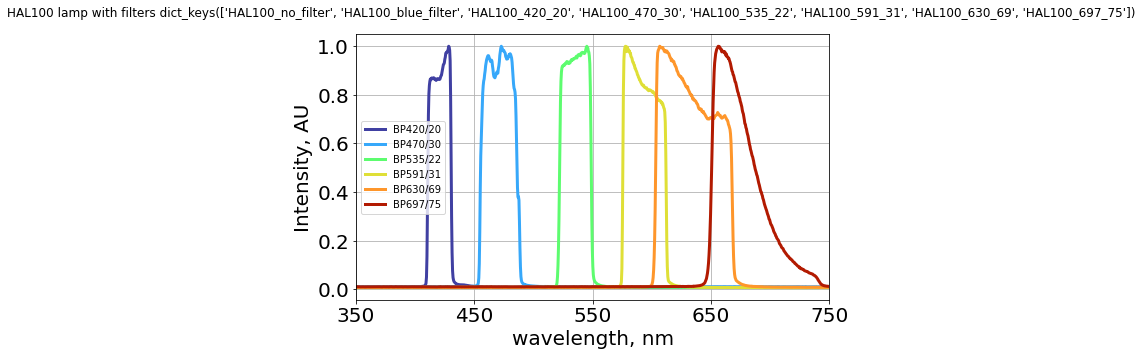

In [77]:
# plot the middle sections of Z-profile along Y axis (longest axis) and X (shortest)
fig = plt.figure(figsize=(8, 5))
fig_title = f"HAL100 lamp with filters {NAMES.keys()}"
fig.suptitle(fig_title)
FONTSIZE_LABELS = FONTSIZE_TITLES = 20
wl_range = np.array((350, 750))
#keys_exclude = ["HAL100_420_20", "HAL100_470_30", "HAL100_535_22", "HAL100_591_31", "HAL100_630_69", "HAL100_697_75"]
keys_exclude = ["HAL100_no_filter", "HAL100_blue_filter"]

ax0 = plt.subplot(1, 1, 1)
ax0.tick_params(axis='both', which='major', labelsize=FONTSIZE_LABELS)
for key in dict_spectra.keys():
    if key not in keys_exclude:
        ax0.plot(dict_spectra[key][:,0], dict_spectra[key][:,1]/dict_spectra[key][:,1].max(), 
             label=NAMES[key], color=COLORS[key], lw=3)
# ax0.set_ylim([0, y_range[-1]])
ax0.set_xlim(wl_range)
ax0.set_ylabel('Intensity, AU', fontsize=FONTSIZE_LABELS)
ax0.set_xlabel('wavelength, nm', fontsize=FONTSIZE_LABELS)
# ax0.set_yticks(np.round((0, y_range[-1]/4, y_range[-1]/2, y_range[-1]*3/4, y_range[-1]),2))
ax0.set_xticks(np.arange(wl_range[0], wl_range[1]+100, 100))
ax0.legend(loc='best')
ax0.grid(True)

fig.tight_layout()

In [78]:
fig.savefig(save_figs_folder + "HAL100-spectra-BP.png", dpi=200)